<center>Oil price prediction</center>
Link to data on <a href="https://www.kaggle.com/naveenkonam1985/crude-oil-price-prediction/data"> Kaggle</a>


<br>Steps:</br>
<ul>
<li>-Wrangle data</li>
<li>-Visualize data</li>
<li>-Creating prediction</li>
</ul>



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pystan
import seaborn as sns # Plotting library
from prophet import Prophet
from prophet.diagnostics import cross_validation 
from prophet.diagnostics import performance_metrics 
from prophet.plot import plot_cross_validation_metric


In [2]:
df = pd.read_csv("crude-oil-price.csv")

In [3]:
#change column name
df = df.rename(columns={'change' : 'dollarChange'})
df = df.rename(columns={'date' : 'Date'})
df = df.rename(columns={'price' : 'Price'})
df['Date'] = pd.to_datetime(df['Date']).dt.date
df#.head()

,Date,Price,percentChange,dollarChange
0,1983-03-30,29.27,NaN,NaN
1,1983-04-04,30.63,4.646396,1.36
2,1983-05-02,30.25,-1.240614,-0.38
3,1983-06-01,31.38,3.735537,1.13
4,1983-07-01,32.00,1.975781,0.62
...,...,...,...,...
464,2021-11-01,65.85,-19.479090,-15.93
465,2021-12-01,74.88,13.712984,9.03
466,2022-01-03,86.49,15.504808,11.61
467,2022-02-01,95.72,10.671754,9.23


In [4]:
df.describe()

,Price,percentChange,dollarChange
count,469.000000,468.000000,468.000000
mean,44.071641,0.838667,0.171068
std,28.376748,10.685748,4.954575
min,10.420000,-54.244861,-32.830000
25%,20.270000,-5.040127,-1.632500
50%,30.830000,0.956201,0.280000
75%,63.580000,6.511568,2.317500
max,140.000000,88.375796,16.650000


Minimal price - 10.42
<br>Maximal price - 140.00</br>

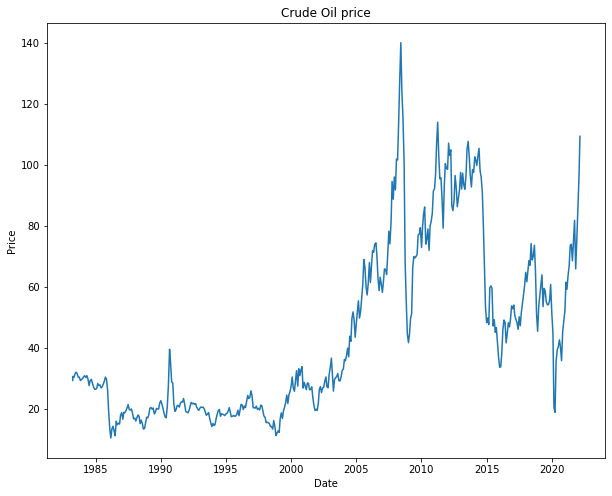

In [5]:
plt.figure(figsize=(10,8))
#plt.plot(df['Date'], df['Price']) 
plt.title('Crude Oil price')
sns.lineplot(data=df, x = 'Date', y = 'Price')
plt.show()

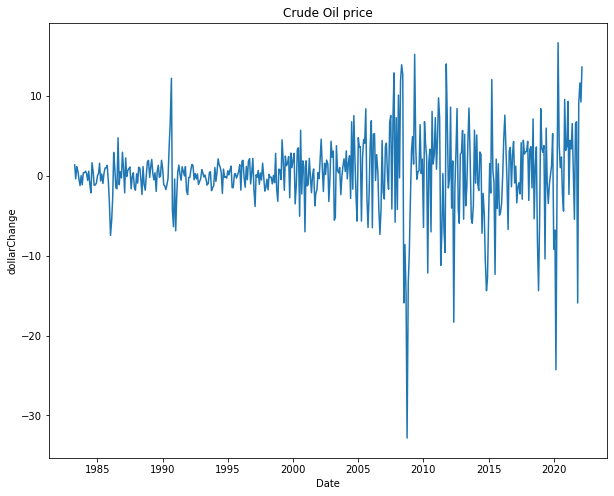

In [6]:
plt.figure(figsize=(10,8))
#plt.plot(df['Date'], df['dollarChange']) 
plt.title('Crude Oil price')
sns.lineplot(data=df, x = 'Date', y = 'dollarChange')
plt.show()

In [7]:
df = df.rename(columns = {'Date':'ds', 'Price':'y'})
model = Prophet()
model.fit(df[['ds', 'y']])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


AttributeError: 'StanModel' object has no attribute 'fit_class'